In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Raw Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read in your data as a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/DA/IMDbID-Per-Val-Genre-rating.csv')
data.dropna(inplace=True)
data.head()

,user_id,Concen,Neoro,Open,Extra,Agree,OpenV,selftran,Conserv,Selfenhan,Hedo,genre,rate
0,ur0159076,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Drama,5.0
1,ur0159076,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Animation,9.0
2,ur0159076,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Comedy,9.0
3,ur0159076,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Family,9.0
4,ur0159076,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Music,9.0


#Drop Columns user_id and rate

In [ ]:
data = data.drop(data.columns[0], axis=1)
data = data.drop(['rate'], axis=1)

#X = df.drop('rate', axis=1)
data.head()

,Concen,Neoro,Open,Extra,Agree,OpenV,selftran,Conserv,Selfenhan,Hedo,genre
0,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Drama
1,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Animation
2,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Comedy
3,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Family
4,0.13,0.25,0.86,0.18,0.01,0.83,0.34,0.08,0.9,0.71,Music


#Keep only specific genres and remove other rows and workong on only 5 Basic Human Values 

In [ ]:
#df = data.drop('selftran', axis=1)
#columns_to_drop = ['selftran', 'Conserv', 'Selfenhan','Hedo','OpenV']
#  Drop Big 5 Traits taking only  Basic Human Values 
columns_to_drop = ['Concen','Neoro', 'Open','Extra','Agree']
#columns_to_drop = ['Neoro', 'Open','Extra','selftran', 'Conserv']
#columns_to_drop = ['Open','Extra','Agree','Hedo','selftran', 'Conserv', 'Selfenhan','OpenV']
data = data.drop(columns_to_drop, axis=1)
# Keep only specific genres and remove other rows
specific_genres = [ 'Comedy','Sci-Fi','Thriller']
data = data[data['genre'].isin(specific_genres)]

In [ ]:
data.head()

,OpenV,selftran,Conserv,Selfenhan,Hedo,genre
2,0.83,0.34,0.08,0.9,0.71,Comedy
6,0.83,0.34,0.08,0.9,0.71,Comedy
8,0.83,0.34,0.08,0.9,0.71,Comedy
11,0.83,0.34,0.08,0.9,0.71,Comedy
17,0.83,0.34,0.08,0.9,0.71,Comedy


#Distribution of Genres Specific

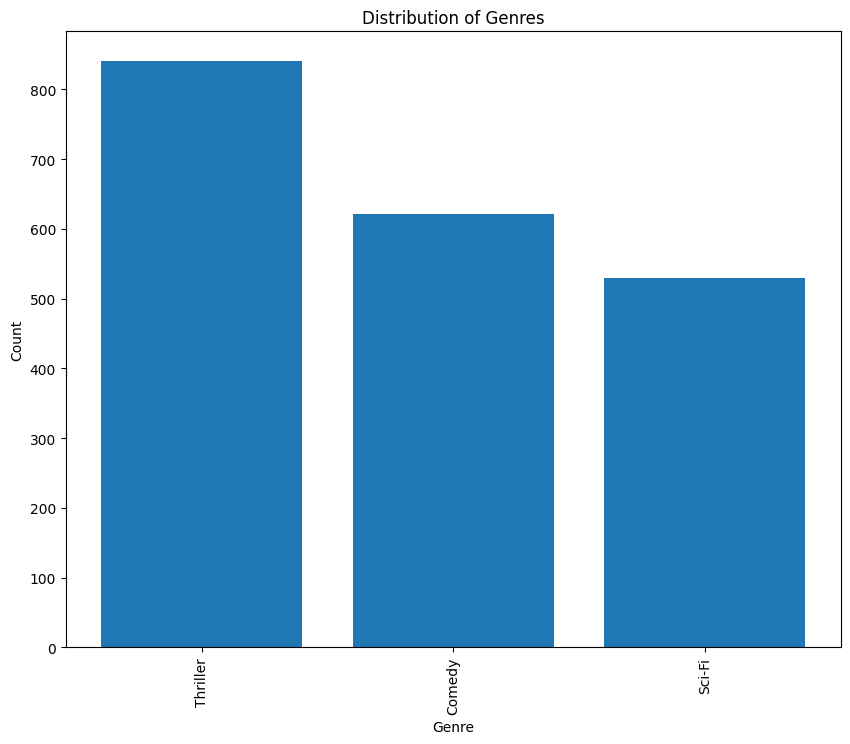

In [ ]:
# convert the genre column to string data type
data['genre'] = data['genre'].astype(str)

# count the number of occurrences of each genre
genre_counts = data['genre'].value_counts()

# set the figure size
plt.figure(figsize=(10, 8))

# create a bar chart of the genre data
plt.bar(genre_counts.index, genre_counts.values)

# add axis labels and a title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres')

# rotate the x-axis labels if necessary
plt.xticks(rotation=90)

# display the bar chart
plt.show()


Central Tendency

In [ ]:
import statistics
import pandas as pd


# Select only the numeric columns
num_cols = data.select_dtypes(include='number')

# Define a function to calculate the mode of a list of values
def mode(num_cols):
    try:
        return statistics.mode(num_cols)
    except:
        return "No unique mode"

# Calculate the statistics for each numeric column
stats = pd.DataFrame({
#    'Variance': num_cols.var(),
    'Mean': num_cols.mean(),
    'Median': num_cols.median(),
    'Mode': num_cols.apply(lambda x: mode(x))
})

# Print the statistics in a table format
print(stats)

               Mean  Median  Mode
OpenV      0.504744    0.46  0.46
selftran   0.380899    0.29  0.14
Conserv    0.405853    0.30  0.17
Selfenhan  0.577761    0.66  0.66
Hedo       0.556416    0.60  0.53


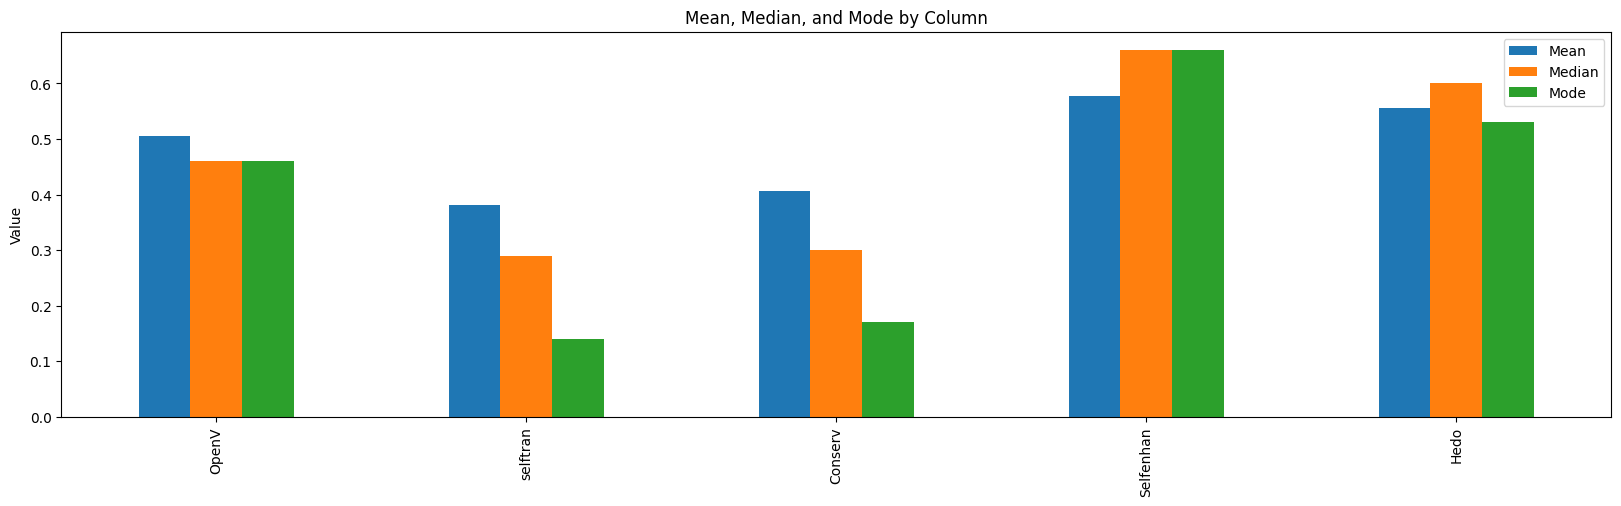

In [ ]:
# Select only the numeric columns (excluding rate)
#num_cols = df.select_dtypes(include='number').drop('rate', axis=1)

# Define a function to calculate the mode of a list of values
def mode(num_cols):
    try:
        return statistics.mode(num_cols)
    except:
        return "No unique mode"

# Calculate the statistics for each numeric column
stats = pd.DataFrame({
    'Mean': num_cols.mean(),
    'Median': num_cols.median(),
    'Mode': num_cols.apply(lambda x: mode(x))
})


# Create a bar chart for each column
stats.plot(kind='bar',figsize=(20,5))
plt.title('Mean, Median, and Mode by Column')
plt.ylabel('Value')
plt.show()

#Skewness

In [ ]:
numeric_cols = data.select_dtypes(include=[float, int])
skewness = numeric_cols.skew()
print(skewness)

OpenV       -0.063599
selftran     0.815293
Conserv      0.425990
Selfenhan   -0.492764
Hedo        -0.716972
dtype: float64


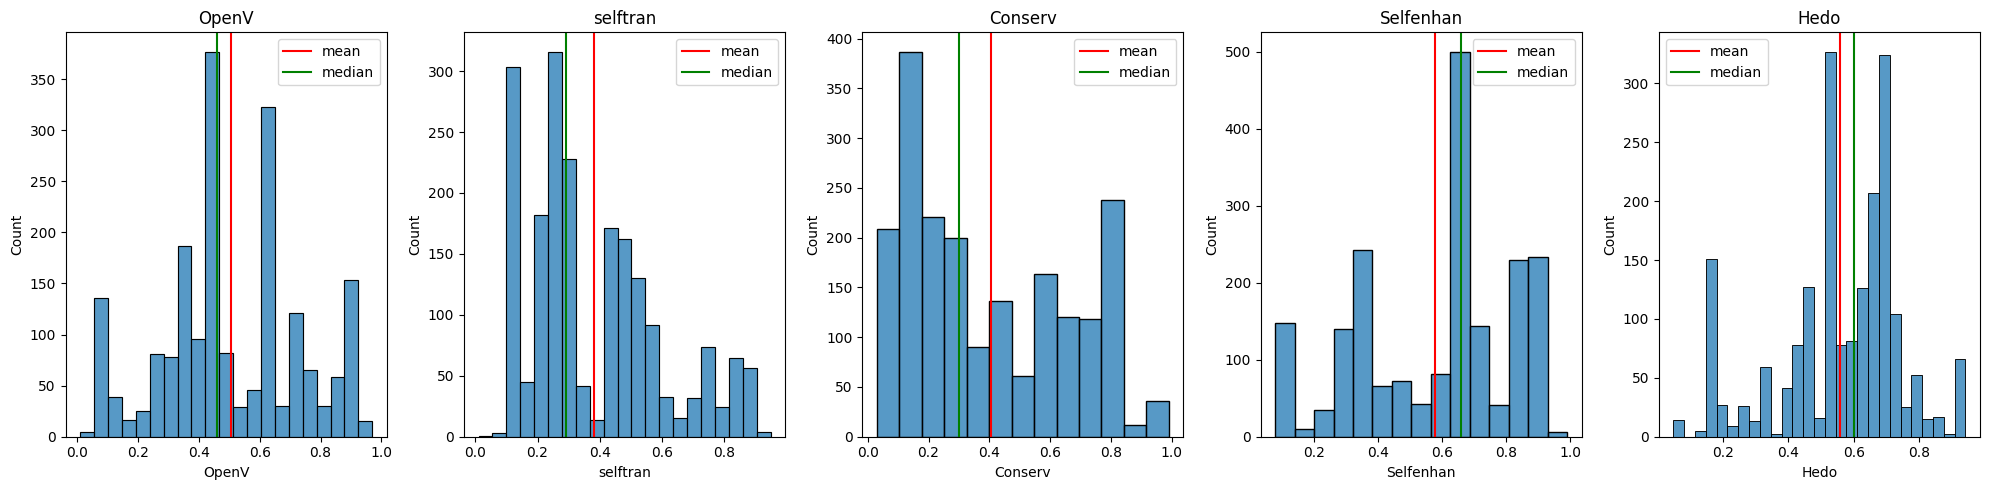

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

numeric_cols = data.iloc[:, :6].select_dtypes(include='number')
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols.columns), figsize=(20, 5))

# Create a histogram with mean and median lines for each column
for i, col in enumerate(numeric_cols.columns):
    sns.histplot(numeric_cols[col], ax=axes[i])
    axes[i].axvline(np.mean(numeric_cols[col]), color='red', label='mean')
    axes[i].axvline(np.median(numeric_cols[col]), color='green', label='median')
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

#Kurtosis

In [ ]:
numeric_cols = data.select_dtypes(include=[float, int])
kurtosis = numeric_cols.kurtosis()
print(kurtosis)

OpenV       -0.618096
selftran    -0.277473
Conserv     -1.129218
Selfenhan   -0.779172
Hedo         0.179509
dtype: float64


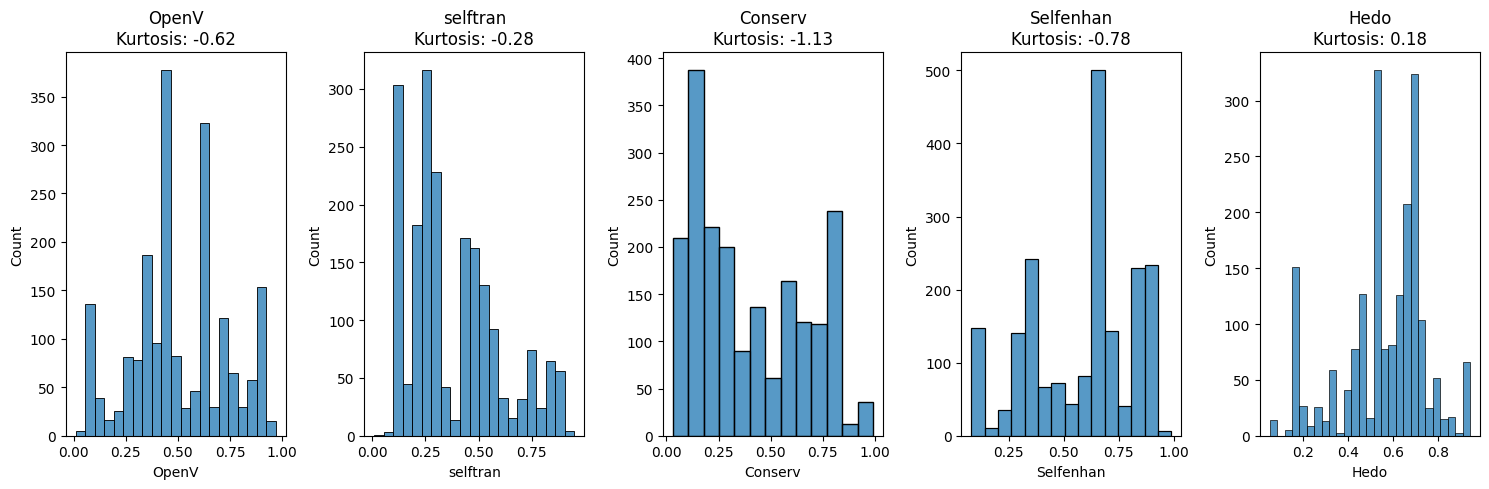

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

numeric_cols = data.iloc[:, :6].select_dtypes(include='number')

# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols.columns), figsize=(15, 5))

# Create a histogram with kurtosis value for each column
for i, col in enumerate(numeric_cols.columns):
    sns.histplot(numeric_cols[col], ax=axes[i])
    kurt = round(numeric_cols[col].kurt(), 2)
    axes[i].set_title(f'{col}\nKurtosis: {kurt}')

plt.tight_layout()
plt.show()

#Outliers Using BoxPlot

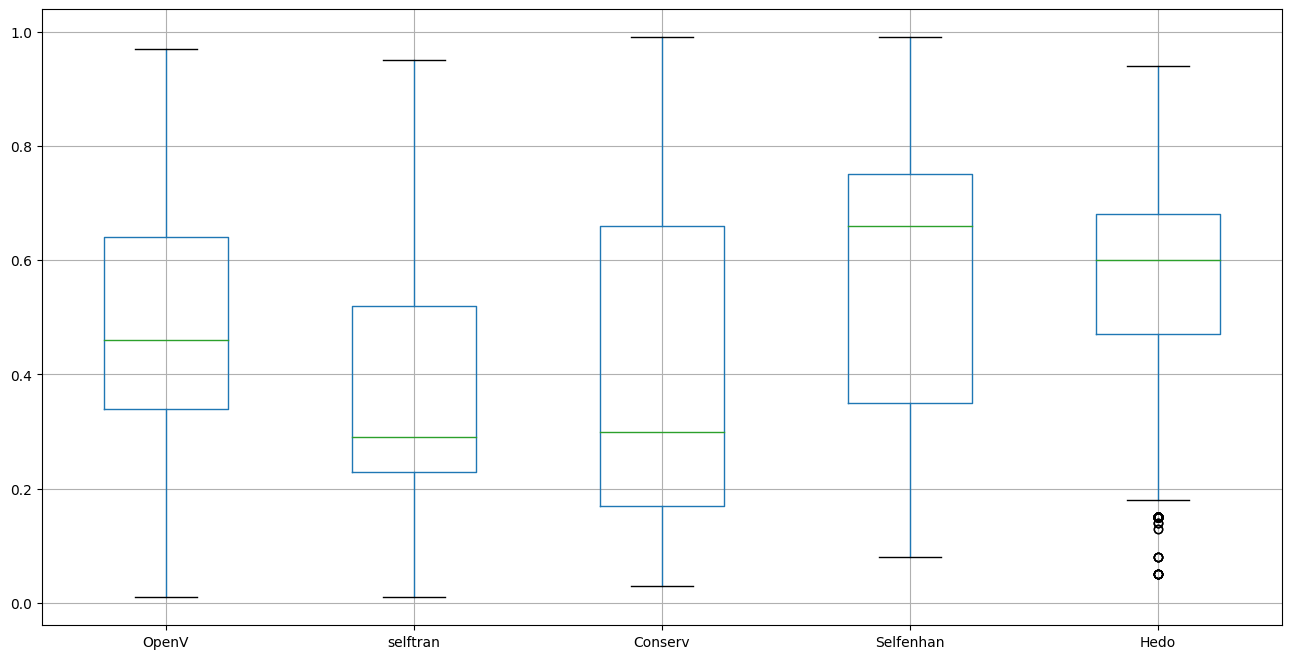

In [ ]:
# create a boxplot for each column
data.boxplot(column=[ 'OpenV', 'selftran','Conserv', 'Selfenhan', 'Hedo' ], showfliers=True, figsize=(16,8))
plt.show()

#Correlation

<ipython-input-509-be570a689672>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


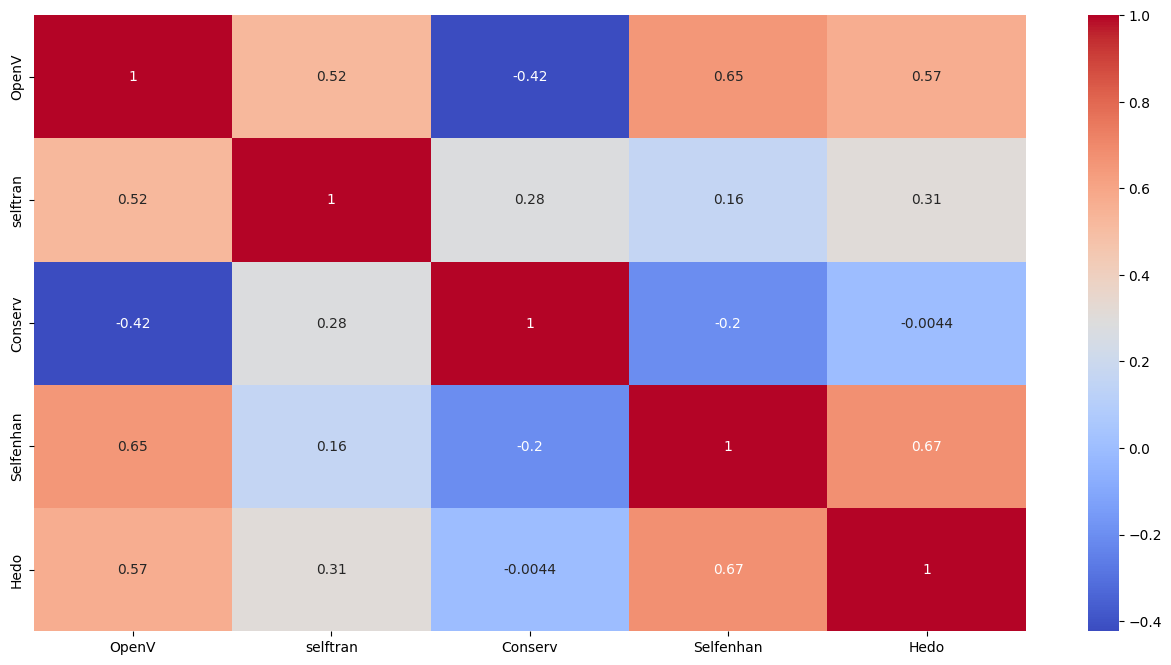

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#df.head()
#df.genre.value_counts()
corr_matrix = data.corr()
#print(corr_matrix)

plt.figure(figsize=(16, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#Hypothesis

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp



# Define null hypothesis
null_hypothesis = 0.5

# Create table to store t-statistic, p-value, and reject null hypothesis
results = pd.DataFrame(columns=['Column', 't-Statistic', 'p-value'])

# Perform one-sample t-test for each column
for col in data.columns:
    if data[col].dtype == 'float64':  # Check if column is numeric
        t_statistic, p_value = ttest_1samp(data[col], null_hypothesis)
        reject_null = 'Yes' if p_value < 0.05 else 'No'
        results = results.append({'Column': col, 't-Statistic': t_statistic, 'p-value': p_value }, ignore_index=True)

# Print results table
print(results)

      Column  t-Statistic        p-value
0      OpenV     0.925280   3.549322e-01
1   selftran   -24.845770  6.368650e-119
2    Conserv   -16.287843   4.321420e-56
3  Selfenhan    14.407648   7.682566e-45
4       Hedo    13.458730   1.391754e-39


<ipython-input-22-30828cc9f829>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Column': col, 't-Statistic': t_statistic, 'p-value': p_value }, ignore_index=True)
<ipython-input-22-30828cc9f829>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Column': col, 't-Statistic': t_statistic, 'p-value': p_value }, ignore_index=True)
<ipython-input-22-30828cc9f829>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Column': col, 't-Statistic': t_statistic, 'p-value': p_value }, ignore_index=True)
<ipython-input-22-30828cc9f829>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

# Donot run SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd


# Split your dataset into features (X) and target (y)
X = data.drop('genre', axis=1)
y = data['genre']

# Apply SMOTE to balance the target variable
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled data into a new dataframe
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Select 500 rows for each unique value in the target variable
selected_data = []
unique_genres = resampled_data['genre'].unique()
for genre in unique_genres:
    genre_data = resampled_data.loc[resampled_data['genre'] == genre].sample(n=600, random_state=42)
    selected_data.append(genre_data)

# Combine the selected data into a new dataframe
data = pd.concat(selected_data)



#Classifications

##Decision Tree

Accuracy: 0.49


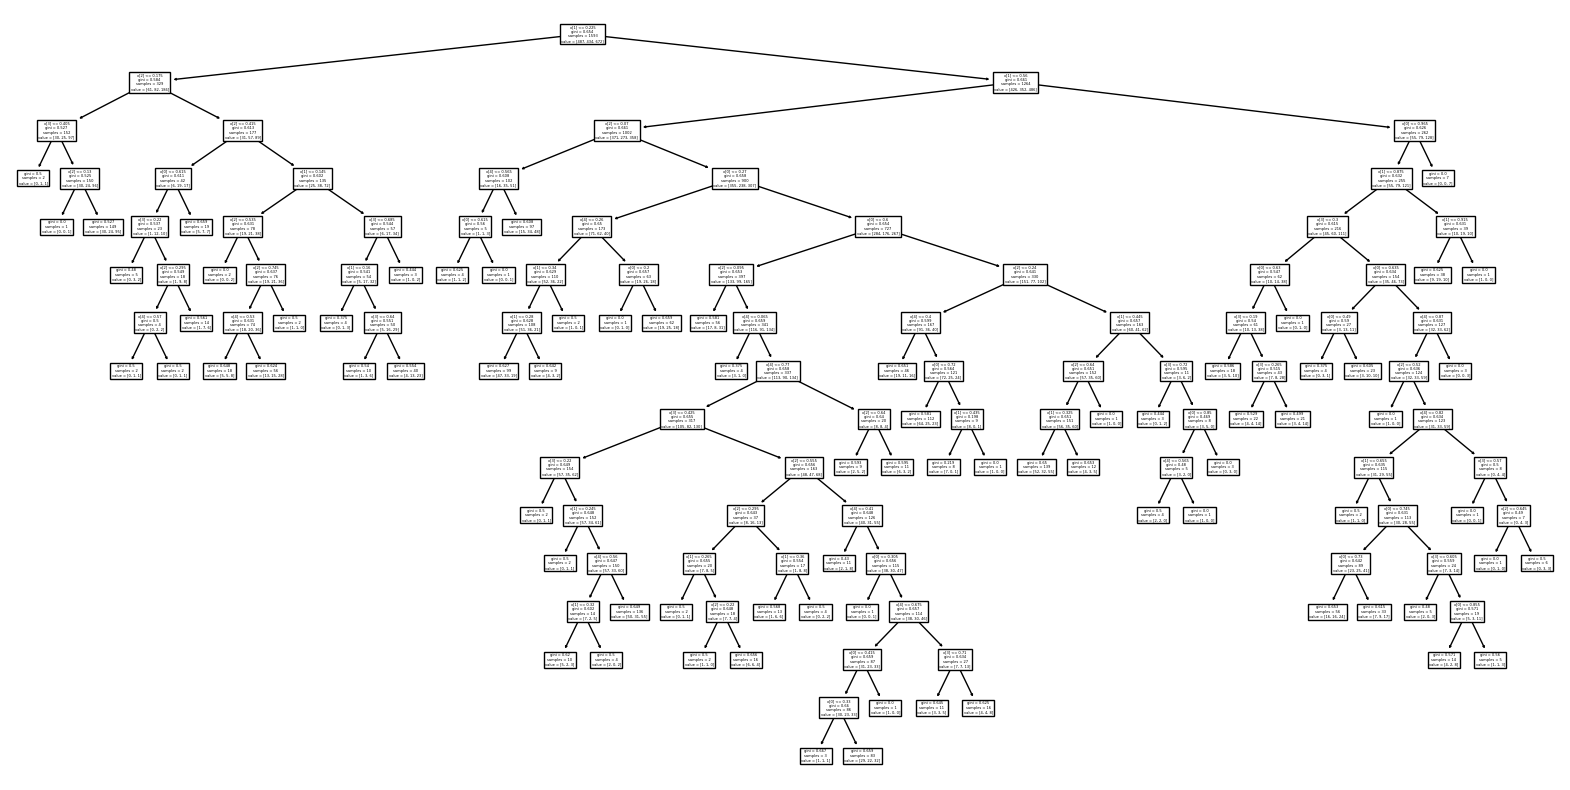

Confusion Matrix:
[[ 52   7  75]
 [ 14  18  64]
 [ 26  19 124]]
Accuracy for each class:
Genre 0: 0.39
Genre 1: 0.19
Genre 2: 0.73


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt



# Split your dataset into features (X) and target (y)
X = data.drop('genre', axis=1)
y = data['genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt, ax=ax)
plt.show()

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy for each class
accuracies = []
for i in range(len(cm)):
    acc = cm[i,i] / sum(cm[i,:])
    accuracies.append(acc)

# Print the accuracies for each class
print("Accuracy for each class:")
for i, acc in enumerate(accuracies):
    print(f"Genre {i}: {acc:.2f}")

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into X and y variables
X = data.iloc[:, :-1]  # select all columns except the last one
y = data.iloc[:, -1]   # select the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy for each class
accuracies = []
for i in range(len(cm)):
    acc = cm[i,i] / sum(cm[i,:])
    accuracies.append(acc)

# Print the accuracies for each class
print("Accuracy for each class:")
for i, acc in enumerate(accuracies):
    print(f"Genre {i}: {acc:.2f}")



Accuracy: 0.40350877192982454
Confusion Matrix:
[[35 56 43]
 [17 35 44]
 [27 51 91]]
Accuracy for each class:
Genre 0: 0.26
Genre 1: 0.36
Genre 2: 0.54


## Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your data into a pandas dataframe
#data = pd.read_csv('/content/drive/MyDrive/DA/balanced_dataset.csv')

# Split the data into X and y variables
X = data.iloc[:, :-1]  # select all columns except the last one
y = data.iloc[:, -1]   # select the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 decision trees
rf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy for each class
accuracies = []
for i in range(len(cm)):
    acc = cm[i,i] / sum(cm[i,:])
    accuracies.append(acc)

# Print the accuracies for each class
print("Accuracy for each class:")
for i, acc in enumerate(accuracies):
    print(f"Genre {i}: {acc:.2f}")



Accuracy: 0.48370927318295737
Confusion Matrix:
[[ 50   8  76]
 [ 15  16  65]
 [ 25  17 127]]
Accuracy for each class:
Genre 0: 0.37
Genre 1: 0.17
Genre 2: 0.75


## ADAboost

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Split the data into X and y variables
X = data.iloc[:, :-1]  # select all columns except the last one
y = data.iloc[:, -1]   # select the last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with 1000 decision trees
ada = AdaBoostClassifier(n_estimators=1000)

# Train the classifier on the training data
ada.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ada.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy for each class
accuracies = []
for i in range(len(cm)):
    acc = cm[i,i] / sum(cm[i,:])
    accuracies.append(acc)

# Print the accuracies for each class
print("Accuracy for each class:")
for i, acc in enumerate(accuracies):
    print(f"Genre {i}: {acc:.2f}")


Accuracy: 0.46365914786967416
Confusion Matrix:
[[ 46   9  79]
 [ 13  14  69]
 [ 27  17 125]]
Accuracy for each class:
Genre 0: 0.34
Genre 1: 0.15
Genre 2: 0.74


# Clustering

In [ ]:
X = data.drop('genre', axis=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


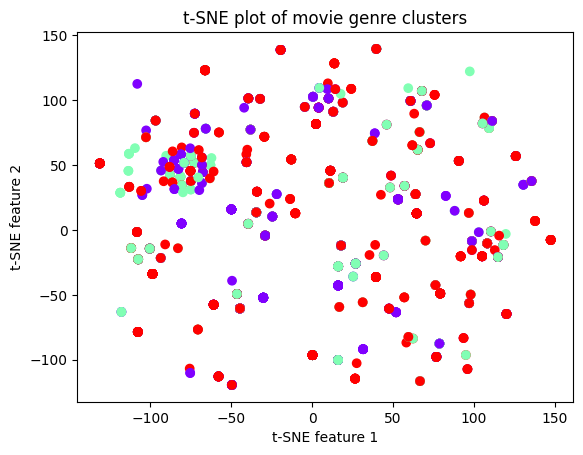

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Select only the numeric features
numeric_cols = ['OpenV', 'selftran','Conserv', 'Selfenhan', 'Hedo']
X = data[numeric_cols]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the target variable
y = data['genre']

# Resample the data to balance the classes
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)

# Train a KMeans clustering model
from sklearn.cluster import KMeans

k = 5  # choose the number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

# Visualize the clusters
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a dictionary that maps each movie genre to a unique integer label
genre_labels = {genre: i for i, genre in enumerate(y_resampled.unique())}

# Convert the movie genres to their corresponding integer labels
y_labels = y_resampled.map(genre_labels)

# Apply t-SNE to reduce the dimensionality of the features
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_resampled)

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_labels, cmap='rainbow')
plt.title('t-SNE plot of movie genre clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

#Regression

In [ ]:
# read in your data as a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/DA/IMDbID-Per-Val-Genre-rating.csv')
data.dropna(inplace=True)
data = data.drop(data.columns[0], axis=1)
#data = data.drop(['rate'], axis=1)

columns_to_drop = ['Concen','Neoro', 'Open','Extra','Agree']

data = data.drop(columns_to_drop, axis=1)
# Keep only specific genres and remove other rows
specific_genres = [ 'Comedy','Sci-Fi','Thriller']
data = data[data['genre'].isin(specific_genres)]


data.head()

,OpenV,selftran,Conserv,Selfenhan,Hedo,genre,rate
2,0.83,0.34,0.08,0.9,0.71,Comedy,9.0
6,0.83,0.34,0.08,0.9,0.71,Comedy,9.0
8,0.83,0.34,0.08,0.9,0.71,Comedy,8.0
11,0.83,0.34,0.08,0.9,0.71,Comedy,10.0
17,0.83,0.34,0.08,0.9,0.71,Comedy,8.0


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# Prepare the data for linear regression
X = data[['OpenV' , 'Hedo',  'Selfenhan' , 'Conserv' , 'selftran' ]]
y = data['rate']
X = sm.add_constant(X) # Add a constant term to the input data

# Cast the input data to the appropriate data types
X = X.astype(float)
y = y.astype(float)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.90
Date:                Sat, 13 May 2023   Prob (F-statistic):           2.26e-12
Time:                        06:26:26   Log-Likelihood:                -4473.7
No. Observations:                1992   AIC:                             8959.
Df Residuals:                    1986   BIC:                             8993.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8032      0.207     32.812      0.0

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
#data = pd.read_csv('/content/drive/MyDrive/DA/balanced_dataset01.csv')

# read in your data as a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/DA/IMDbID-Per-Val-Genre-rating.csv')
data.dropna(inplace=True)
data = data.drop(data.columns[0], axis=1)
data = data.drop(['rate'], axis=1)
columns_to_drop = ['Concen','Neoro', 'Open','Extra','Agree']

data = data.drop(columns_to_drop, axis=1)
# Keep only specific genres and remove other rows
specific_genres = [ 'Comedy','Sci-Fi','Thriller']
data = data[data['genre'].isin(specific_genres)]
data.head()

,OpenV,selftran,Conserv,Selfenhan,Hedo,genre
2,0.83,0.34,0.08,0.9,0.71,Comedy
6,0.83,0.34,0.08,0.9,0.71,Comedy
8,0.83,0.34,0.08,0.9,0.71,Comedy
11,0.83,0.34,0.08,0.9,0.71,Comedy
17,0.83,0.34,0.08,0.9,0.71,Comedy


#Deep learning

##Feed Forward learning

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# read in your data as a pandas DataFrame
#df = pd.read_csv('/content/drive/MyDrive/DA/balanced_dataset.csv')

# Split the data into X and y variables
X = data.iloc[:, :-1]  # select all columns except the last one
y = data.iloc[:, -1]   # select the last column

# Convert the labels to integer values
unique_labels = y.unique()
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y = y.map(label_to_int)

# Convert the labels to one-hot encoding
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model's performance on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Print the model details
model.summary()

Epoch 1/100
50/50 [==============================] - 1s 8ms/step - loss: 1.0999 - accuracy: 0.3672 - val_loss: 1.0743 - val_accuracy: 0.4236
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0890 - accuracy: 0.4168 - val_loss: 1.0740 - val_accuracy: 0.4236
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0855 - accuracy: 0.4212 - val_loss: 1.0693 - val_accuracy: 0.4236
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0814 - accuracy: 0.4269 - val_loss: 1.0700 - val_accuracy: 0.4411
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.4262 - val_loss: 1.0703 - val_accuracy: 0.4461
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4269 - val_loss: 1.0695 - val_accuracy: 0.4461
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 1.0831 - accuracy: 0.4306 - val_loss: 1.0695 - val_accuracy: 0.4461
Epoch 8/100
5